### 명목형 변수와 더미변수

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io
from google.colab.files import upload
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
%matplotlib inline

#### 1. 데이터셋을 읽어 온다.

In [2]:
# df = pd.read_csv('./data/data_studentlist_en.csv', header='infer')  # 로컬파일 읽어오기.

In [3]:
dict_data = upload()                                                  # Colab으로 파일 올리기.
df = pd.read_csv(io.BytesIO(dict_data['data_studentlist_en.csv']))    # Colab으로 올린 파일 읽어오기.

Saving data_studentlist_en.csv to data_studentlist_en.csv


In [4]:
# height, weight, gender 변수를 사용할 예정이다.
df.head(5)

,name,gender,age,grade,absence,bloodtype,height,weight
0,Jared Diamond,M,23,3,Y,O,165.3,68.2
1,Sarah O'Donnel,F,22,2,N,AB,170.1,53.0
2,Brian Martin,M,24,4,N,B,175.0,80.1
3,David Hassel,M,23,3,N,AB,182.1,85.7
4,Clara Rodriquez,F,20,1,Y,A,168.0,49.5


#### 2. 명목형 변수를 사용하지 않는 경우.
<br>
수식: weight ~ height

In [5]:
# 선형회귀.
lm = LinearRegression()
X = df.height.values.reshape(-1,1)
Y = df.weight.values.reshape(-1,1)
lm.fit(X,Y)
b0 = lm.intercept_[0]
b1 = lm.coef_[0][0]
rsq1 = lm.score(X,Y)
rmse1 = np.sqrt(mean_squared_error(Y, lm.predict(X)))

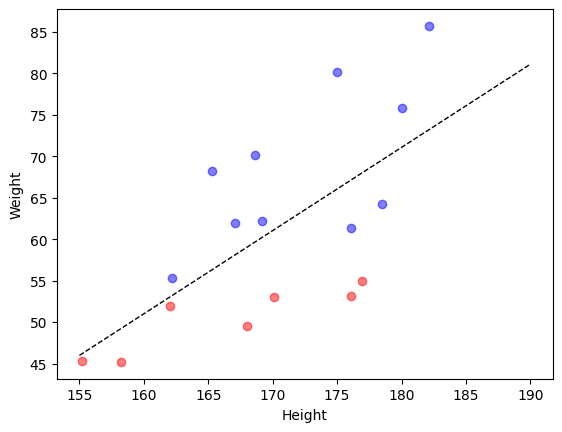

In [6]:
# 시각화.
# 회귀선을 gender별로 구분할 필요는 없다.
df_m = df[df.gender=='M']
df_f = df[df.gender=='F']
x_grid = np.linspace(155,190,10)
plt.scatter(x=df_m.height, y=df_m.weight, color='blue', alpha = 0.5)
plt.scatter(x=df_f.height, y=df_f.weight, color='red', alpha = 0.5)
plt.plot(x_grid, b0 + b1*x_grid, linestyle='--',linewidth=1,color='black')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

#### 3. 명목형 변수를 사용하는 경우.
<br>
수식: weight ~ height + gender

In [7]:
# 'gender'를 사용해서 더미변수를 만든다.
gender_dummy = pd.get_dummies(df.gender, drop_first=True, prefix='gender')
X = df[['height']].join(gender_dummy)
Y = df[['weight']]
X

,height,gender_M
0,165.3,1
1,170.1,0
2,175.0,1
3,182.1,1
4,168.0,0
5,162.0,0
6,155.2,0
7,176.9,0
8,178.5,1
9,176.1,1


In [8]:
# 선형회귀.
lm.fit(X,Y)
b0 = lm.intercept_[0]
b1 = lm.coef_[0][0]
b2 = lm.coef_[0][1]
rsq2 = lm.score(X,Y)
rmse2 = np.sqrt(mean_squared_error(Y, lm.predict(X)))

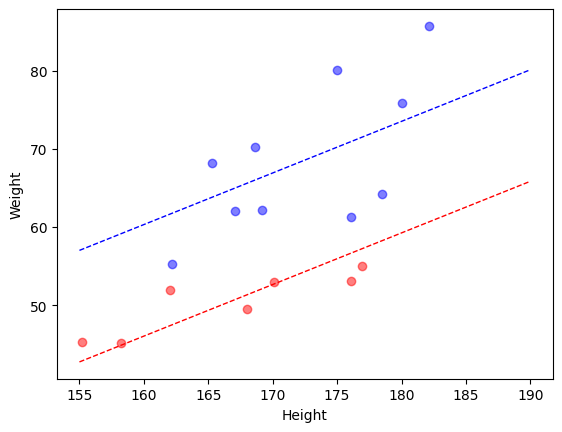

In [9]:
# 시각화.
# 회귀선을 gender별로 구분한다.
df_m = df[df.gender=='M']
df_f = df[df.gender=='F']
x_grid = np.linspace(155,190,10)
plt.scatter(x=df_m.height, y=df_m.weight, color='blue', alpha = 0.5)
plt.scatter(x=df_f.height, y=df_f.weight, color='red', alpha = 0.5)
plt.plot(x_grid, b0 + b1*x_grid, linestyle='--',linewidth=1,color='red')
plt.plot(x_grid, (b0 + b2) + b1*x_grid, linestyle='--',linewidth=1,color='blue')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

#### 4. 상호작용하는 명목형 변수를 사용하는 경우.
<br>
수식: weight ~ height + gender + height $\times$ gender

In [10]:
# 'gender'를 사용해서 더미변수를 만든다.
gender_dummy = pd.get_dummies(df.gender, drop_first=True, prefix='gender')
X = df[['height']].join(gender_dummy)
Y = df[['weight']]
X

,height,gender_M
0,165.3,1
1,170.1,0
2,175.0,1
3,182.1,1
4,168.0,0
5,162.0,0
6,155.2,0
7,176.9,0
8,178.5,1
9,176.1,1


In [11]:
# 상호작용 항을 만든다. 
X['height x gender_M'] = X['height']*X['gender_M']
X.head(5)

,height,gender_M,height x gender_M
0,165.3,1,165.3
1,170.1,0,0.0
2,175.0,1,175.0
3,182.1,1,182.1
4,168.0,0,0.0


In [12]:
# 선형회귀.
lm.fit(X,Y)
b0 = lm.intercept_[0]
b1 = lm.coef_[0][0]
b2 = lm.coef_[0][1]
b3 = lm.coef_[0][2]
rsq3 = lm.score(X,Y)
rmse3 = np.sqrt(mean_squared_error(Y, lm.predict(X)))

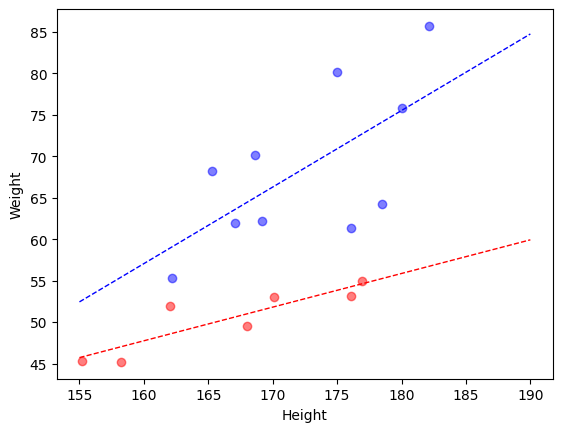

In [13]:
# 시각화.
# 회귀선을 gender별로 구분할 필요는 없다.
df_m = df[df.gender=='M']
df_f = df[df.gender=='F']
x_grid = np.linspace(155,190,10)
plt.scatter(x=df_m.height, y=df_m.weight, color='blue', alpha = 0.5)
plt.scatter(x=df_f.height, y=df_f.weight, color='red', alpha = 0.5)
plt.plot(x_grid, b0 + b1*x_grid, linestyle='--',linewidth=1,color='red')
plt.plot(x_grid, (b0 + b2) + (b1 + b3)*x_grid, linestyle='--',linewidth=1,color='blue')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

#### 5. $R^2$와 RMSE 비교.

In [14]:
np.round([rsq1, rsq2, rsq3],3)                  

array([0.441, 0.762, 0.787])

In [15]:
np.round([rmse1, rmse2, rmse3],3)               

array([8.595, 5.613, 5.307])

**주의: 상호작용하는 명목형 변수가 있을 때 $R^2$는 가장 크고, *RMSE*는 가장 작다.**